# Wind Power Generation Data Analysis


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
for dirname,_, filenames in os.walk('D:/Python/Wind/analyzing_wind_power_generation_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:/Python/Wind/analyzing_wind_power_generation_data\.gitattributes
D:/Python/Wind/analyzing_wind_power_generation_data\50Hertz.csv
D:/Python/Wind/analyzing_wind_power_generation_data\Amprion.csv
D:/Python/Wind/analyzing_wind_power_generation_data\analyzing-wind-power-generation-data.ipynb
D:/Python/Wind/analyzing_wind_power_generation_data\german-wind-power-generation-eda-forecasting.ipynb
D:/Python/Wind/analyzing_wind_power_generation_data\README.md
D:/Python/Wind/analyzing_wind_power_generation_data\TenneTTSO.csv
D:/Python/Wind/analyzing_wind_power_generation_data\time-series-forecasting-arima.ipynb
D:/Python/Wind/analyzing_wind_power_generation_data\TransnetBW.csv
D:/Python/Wind/analyzing_wind_power_generation_data\Untitled.ipynb
D:/Python/Wind/analyzing_wind_power_generation_data\wind-energy-analysis-and-prediction-using-lstm.ipynb
D:/Python/Wind/analyzing_wind_power_generation_data\.git\COMMIT_EDITMSG
D:/Python/Wind/analyzing_wind_power_generation_data\.git\config
D:/Python/Wind/a

# Read the raw dataset

Create the df from csv file that consists of power generation from 4 German companies(50 Hertz, Amprion, Tennet TSO, Transnet BW). Let's start with 50Hertz for first run.

In [28]:
df_50 = pd.read_csv('50Hertz.csv')
x=df_50['Date']
df_50.head()

,Date,00:00:00,00:15:00,00:30:00,00:45:00,01:00:00,01:15:00,01:30:00,01:45:00,02:00:00,...,21:30:00,21:45:00,22:00:00,22:15:00,22:30:00,22:45:00,23:00:00,23:15:00,23:30:00,23:45:00
0,23/08/2019,74,73,63,55,54,53,51,52,45,...,68,68,63,61,57,52,51,49,45,40
1,24/08/2019,37,38,35,35,31,32,30,29,28,...,118,118,112,107,104,104,99,95,95,96
2,25/08/2019,93,88,85,81,76,80,81,76,73,...,111,108,103,96,93,88,86,82,80,77
3,26/08/2019,72,66,59,54,48,46,45,43,42,...,48,47,47,46,47,49,50,51,48,42
4,27/08/2019,39,38,36,36,34,31,31,30,31,...,54,53,51,52,51,52,54,54,56,59


In [68]:
df_50S = df_50.T
df_50S = df_50S[1:]


#Remove 15 mins interval index
df_50S.reset_index(drop=True, inplace=True)

#Sort All colums in Ascending order
df_50S = pd.DataFrame(np.sort(df_50S.values, axis=0))
df_50S


,0,1,2,3,4,5,6,7,8,9,...,387,388,389,390,391,392,393,394,395,396
0,4,8,32,5,11,8,14,2,7,46,...,28,5,38,6,75,5,16,10,5,5
1,4,8,35,5,12,8,15,2,8,46,...,29,6,39,6,76,6,17,10,5,5
2,4,9,36,6,12,8,15,2,9,49,...,30,6,39,6,78,7,17,13,6,6
3,5,9,36,6,12,9,16,2,9,50,...,32,6,40,6,78,8,18,14,7,6
4,6,12,36,7,13,9,16,2,9,51,...,32,6,40,7,79,8,19,18,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,67,121,129,72,77,94,58,38,181,194,...,107,99,120,221,156,87,149,137,82,72
92,68,122,130,74,78,102,61,38,183,197,...,108,100,122,222,157,88,149,141,82,74
93,68,123,136,79,79,103,63,40,187,201,...,111,100,124,226,157,90,150,142,82,75
94,73,125,137,80,82,103,66,40,187,208,...,115,101,125,226,159,91,152,143,83,75


In [69]:
#Extract daily maximum, median, minimum from the dataset
y_max = df_50S.max()
y_max = np.array(y_max,dtype=float)
y_median = df_50S.median()
y_median = np.array(y_median,dtype=float)
y_min = df_50S.min()
y_min = np.array(y_min,dtype=float)

<function matplotlib.pyplot.show(close=None, block=None)>

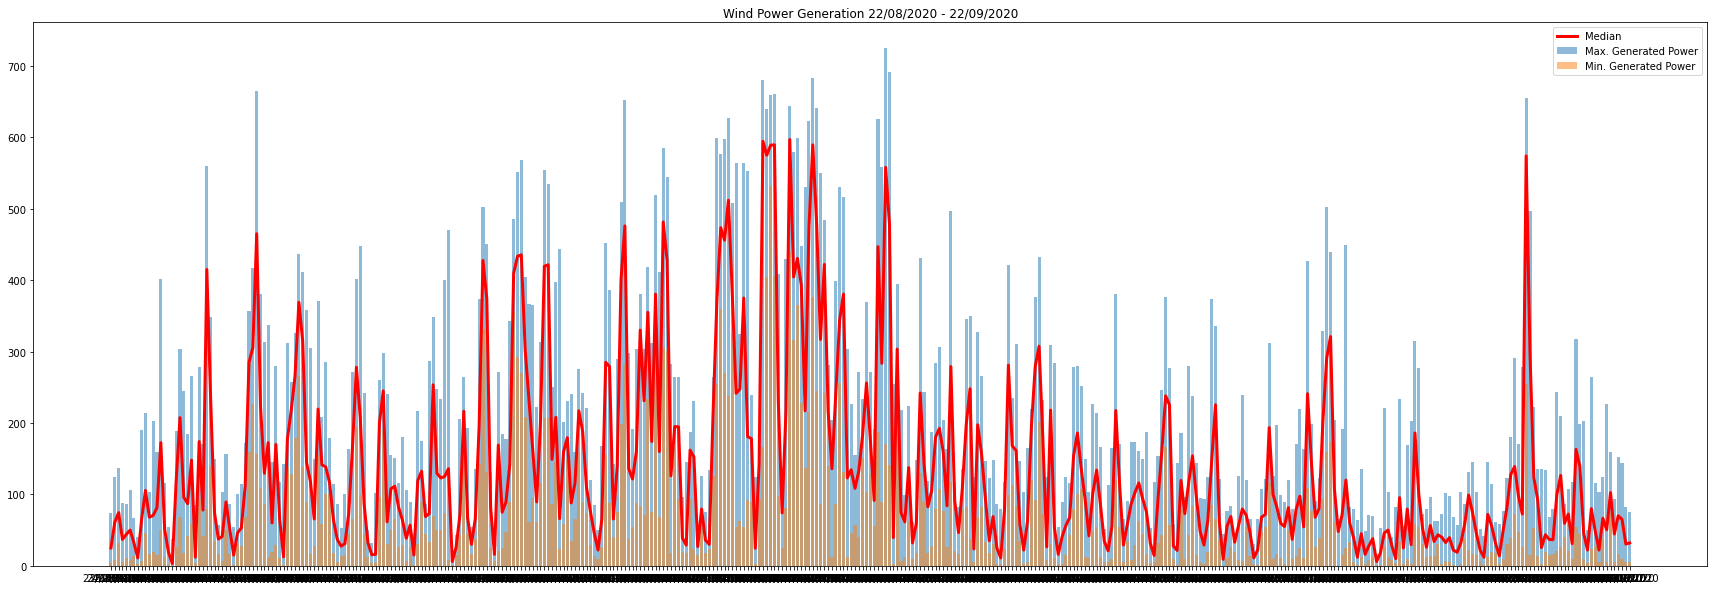

In [70]:
fig=plt.figure(figsize=(30,10))
ax=fig.add_subplot(1,1,1)
ax.bar(x,y_max,alpha=0.5,label='Max. Generated Power')
ax.plot(x,y_median,'r',linewidth=3.0,label='Median')
ax.bar(x,y_min,alpha=0.5,label='Min. Generated Power')
ax.legend()
ax.set_title("Wind Power Generation 22/08/2020 - 22/09/2020")
plt.show

# Apply Filter to reduce the noise

As we can see previously that the wind power generation is in fluctuating behavior. There are many outlier/noise within the dataset. In order to solve the problem, applying a 1d filter helps to reduce the noise so we can analyse the performance of the wind power generation better.

<function matplotlib.pyplot.show(close=None, block=None)>

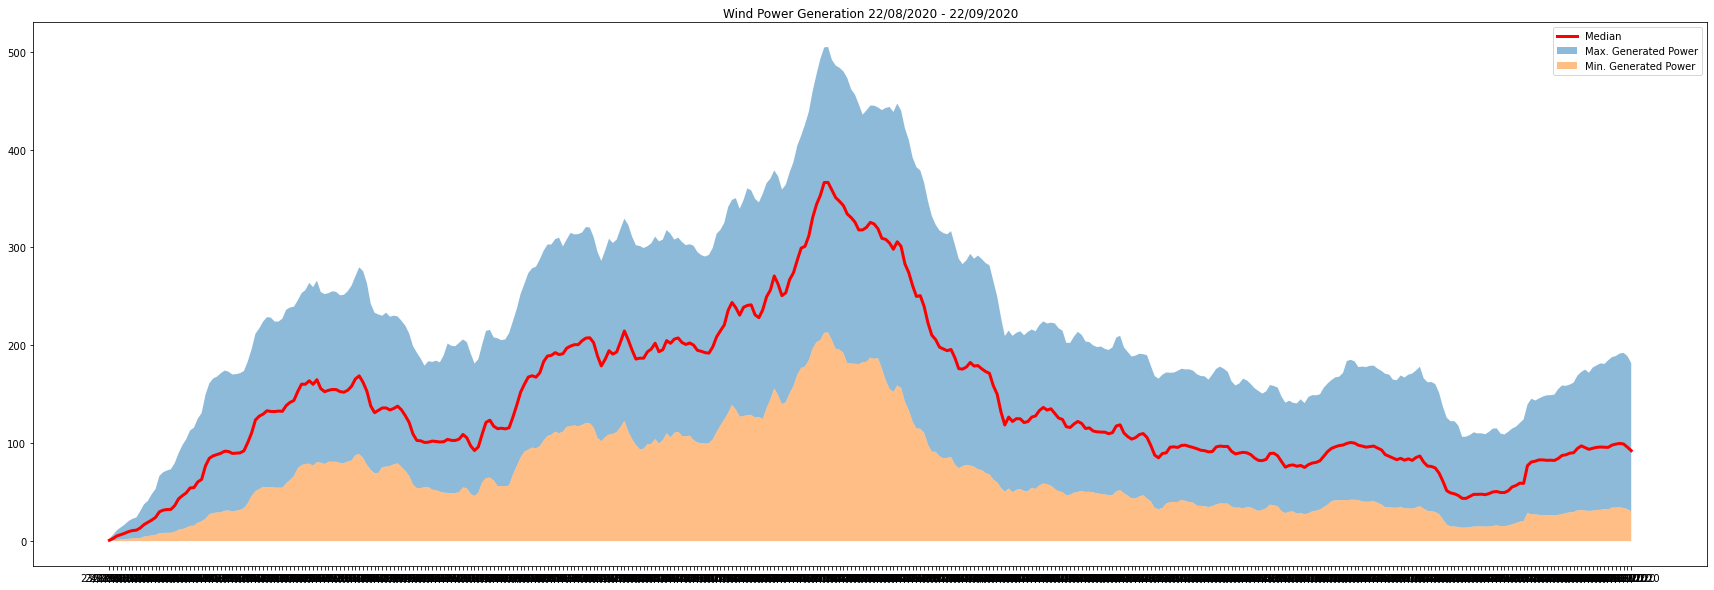

In [71]:
from scipy.signal import lfilter

n = 30 #the larger the n is, the smoother curve will be
b = [1.0 / n] * n
a = 1

fymax_50 = lfilter(b, a, y_max)
fymed_50 = lfilter(b, a, y_median)
fymin_50 = lfilter(b, a, y_min)

y_max_filter
fig=plt.figure(figsize=(30,10))
ax=fig.add_subplot(1,1,1)
ax.fill_between(x,fymax_50,fymin_50,alpha=0.5,label='Max. Generated Power')
ax.plot(x,fymed_50,'r',linewidth=3.0,label='Median')
ax.fill_between(x,fymin_50,0,alpha=0.5,label='Min. Generated Power')
ax.legend()
ax.set_title("Wind Power Generation 22/08/2020 - 22/09/2020")
plt.show

We can now see a clear fugure that the generated power peaks is around the middle of the observation period. Afterwards, we will process other dataset with the same approach and compare among them.

# Amprion Dataset

In [72]:
df_amp=pd.read_csv('Amprion.csv')
df_amp=df_amp.T
df_amp=df_amp[1:]
#Remove 15 Minute Interval Index
df_amp.reset_index(drop=True, inplace=True)
#Sort All Columns Ascending
df_amp = pd.DataFrame(np.sort(df_amp.values, axis=0), index=df_amp.index, columns=df_amp.columns)

#Extract Max, Min, Median
y_max = df_amp.max()
y_max = np.array(y_max,dtype=float)
y_median = df_amp.median()
y_median = np.array(y_median,dtype=float)
y_min = df_amp.min()
y_min = np.array(y_min,dtype=float)
    
#Filter
fymax_amp=lfilter(b,a,y_max)
fymed_amp=lfilter(b,a,y_median)
fymin_amp=lfilter(b,a,y_min)

# Tennet TSO Dataset

In [73]:
df_tso=pd.read_csv('TenneTTSO.csv')
df_tso=df_tso.T
df_tso=df_tso[1:]
#Remove 15 Minute Interval Index
df_tso.reset_index(drop=True, inplace=True)
#Sort All Columns Ascending
df_tso = pd.DataFrame(np.sort(df_tso.values, axis=0), index=df_tso.index, columns=df_tso.columns)

#Extract Max, Min, Median
y_max = df_tso.max()
y_max = np.array(y_max,dtype=float)
y_median = df_tso.median()
y_median = np.array(y_median,dtype=float)
y_min = df_tso.min()
y_min = np.array(y_min,dtype=float)
    
#Filter
fymax_tso=lfilter(b,a,y_max)
fymed_tso=lfilter(b,a,y_median)
fymin_tso=lfilter(b,a,y_min)

# Transnet BW Dataset

In [74]:
df_bw=pd.read_csv('TransnetBW.csv')
df_bw=df_bw.T
df_bw=df_bw[1:]
#Remove 15 Minute Interval Index
df_bw.reset_index(drop=True, inplace=True)
#Sort All Columns Ascending
df_bw = pd.DataFrame(np.sort(df_bw.values, axis=0), index=df_bw.index, columns=df_bw.columns)

#Extract Max, Min, Median
y_max = df_bw.max()
y_max = np.array(y_max,dtype=float)
y_median = df_bw.median()
y_median = np.array(y_median,dtype=float)
y_min = df_bw.min()
y_min = np.array(y_min,dtype=float)
    
#Filter
fymax_bw=lfilter(b,a,y_max)
fymed_bw=lfilter(b,a,y_median)
fymin_bw=lfilter(b,a,y_min)

# Visualize all Dataset

<function matplotlib.pyplot.show(close=None, block=None)>

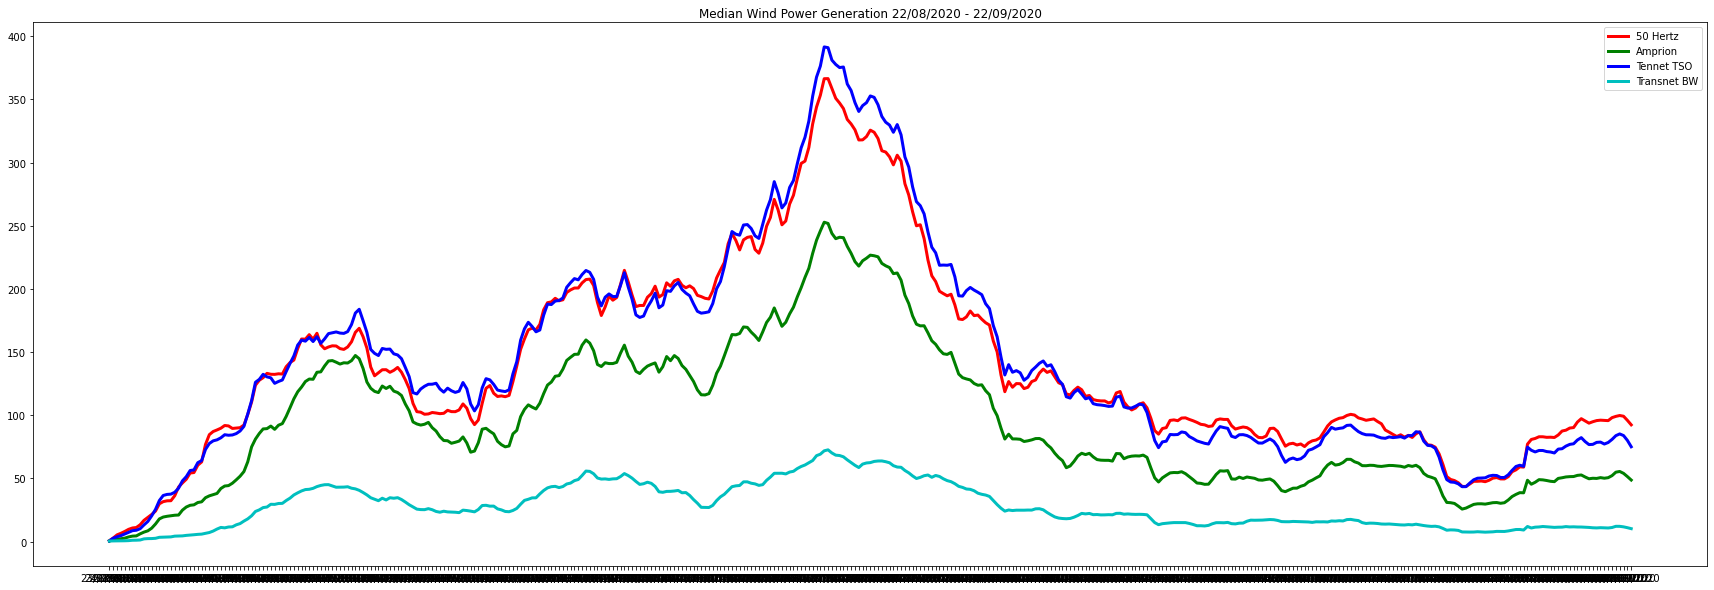

In [75]:
fig=plt.figure(figsize=(30,10))
ax=fig.add_subplot(1,1,1)
ax.plot(x,fymed_50,'r',linewidth=3.0,label='50 Hertz')
ax.plot(x,fymed_amp,'g',linewidth=3.0,label='Amprion')
ax.plot(x,fymed_tso,'b',linewidth=3.0,label='Tennet TSO')
ax.plot(x,fymed_bw,'c',linewidth=3.0,label='Transnet BW')


ax.legend()
ax.set_title("Median Wind Power Generation 22/08/2020 - 22/09/2020")
plt.show



The figure above shows that the power generation curves of 50 Hertz and Tennet TSO are quite similar, while Amprion and Transnet show a lower amount of power generation during the observation period.

# Measuring the Difference between 50 Hertz and Tennet TSO Dataset

we can treat the curves as "signals", we can calculate the relative error between these two datasets.

ERROR = ∑|y1(n)−y2(n)|^2

NORMALIZED=∑|y1(n)−y2(n)|^2/∑|y1(n)|^2 (Relative error with respect to y1)

<function matplotlib.pyplot.show(close=None, block=None)>

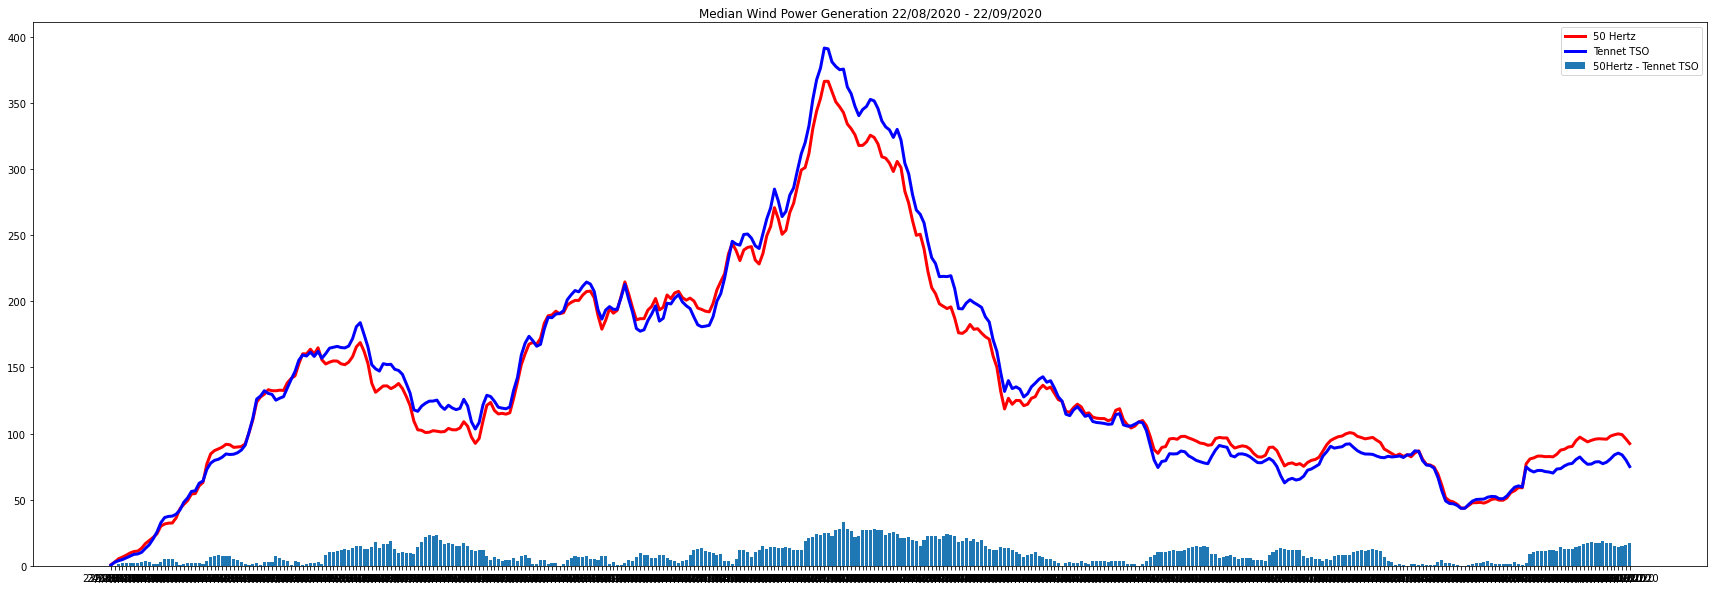

In [77]:
fig=plt.figure(figsize=(30,10))
ax=fig.add_subplot(1,1,1)
ax.plot(x,fymed_50,'r',linewidth=3.0,label='50 Hertz')
ax.plot(x,fymed_tso,'b',linewidth=3.0,label='Tennet TSO')
ax.bar(x,np.abs(fymed_50-fymed_tso),label='50Hertz - Tennet TSO')
ax.legend()
ax.set_title("Median Wind Power Generation 22/08/2020 - 22/09/2020")
plt.show

In [80]:
err=(np.abs(fymed_50-fymed_tso))**2
err=err.sum()
rel=(np.abs(fymed_50))**2
rel=rel.sum()
err_rel=100*err/rel
print("Relative error between 50 Hertz and Tennet TSO data: ",np.round(err_rel,2),"%")

Relative error between 50 Hertz and Tennet TSO data:  0.55 %


The calculation shows that there is an overall difference of 0.55% between the two datasets (in respect to 50 Hertz values). We can conclude that the wind power generation data is measured quite accurately by both companies since the deviation is under 1%.